# Pre-Lecture Homework 

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


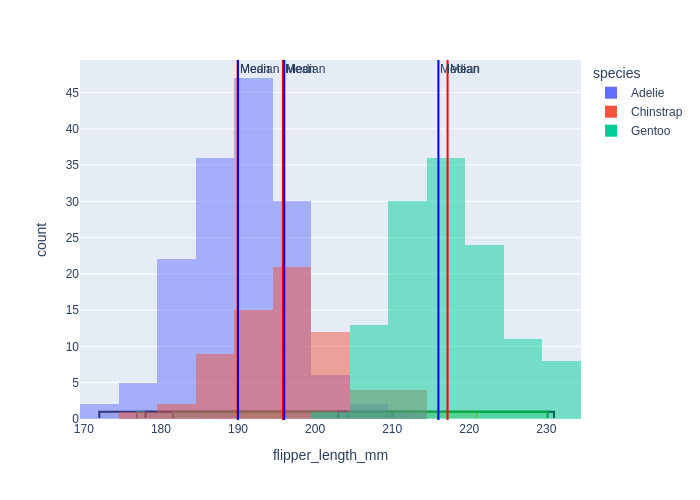

In [7]:
#QUESTION 1. 

!pip install pandas plotly

import pandas as pd

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins_df = pd.read_csv(url)
print(penguins_df.head())

species_stats = penguins_df.groupby('species')['flipper_length_mm'].agg(['mean', 'median', 'min', 'max', 'std'])
species_stats['range'] = species_stats['max'] - species_stats['min']
species_stats['Q1'] = penguins_df.groupby('species')['flipper_length_mm'].quantile(0.25)
species_stats['Q3'] = penguins_df.groupby('species')['flipper_length_mm'].quantile(0.75)
species_stats['IQR'] = species_stats['Q3'] - species_stats['Q1']
species_stats['std_dev'] = species_stats['std']

import plotly.express as px

fig = px.histogram(penguins_df, x='flipper_length_mm', color='species', barmode='overlay')

for species, row in species_stats.iterrows():
    mean = row['mean']
    median = row['median']
    min_val = row['min']
    max_val = row['max']
    Q1 = row['Q1']
    Q3 = row['Q3']
    std_dev = row['std_dev']
    
    # Add lines for mean and median
    fig.add_vline(x=mean, line_color='red', line_width=2, annotation_text='Mean', annotation_position='top right')
    fig.add_vline(x=median, line_color='blue', line_width=2, annotation_text='Median', annotation_position='top right')
    
    # Add rectangles for range and IQR
    fig.add_shape(type="rect", x0=min_val, x1=max_val, y0=0, y1=1, line_color="black", fillcolor="rgba(0,0,0,0.1)", 
                  layer='below', name='Range')
    fig.add_shape(type="rect", x0=Q1, x1=Q3, y0=0, y1=1, line_color="orange", fillcolor="rgba(255,165,0,0.2)", 
                  layer='below', name='IQR')
    
    # Standard deviation rectangles
    fig.add_shape(type="rect", x0=mean - 2*std_dev, x1=mean + 2*std_dev, y0=0, y1=1,
                  line_color="green", fillcolor="rgba(0,255,0,0.2)", layer='below', name='±2 Std Dev')

# Show the figure
fig.show(renderer = "png")



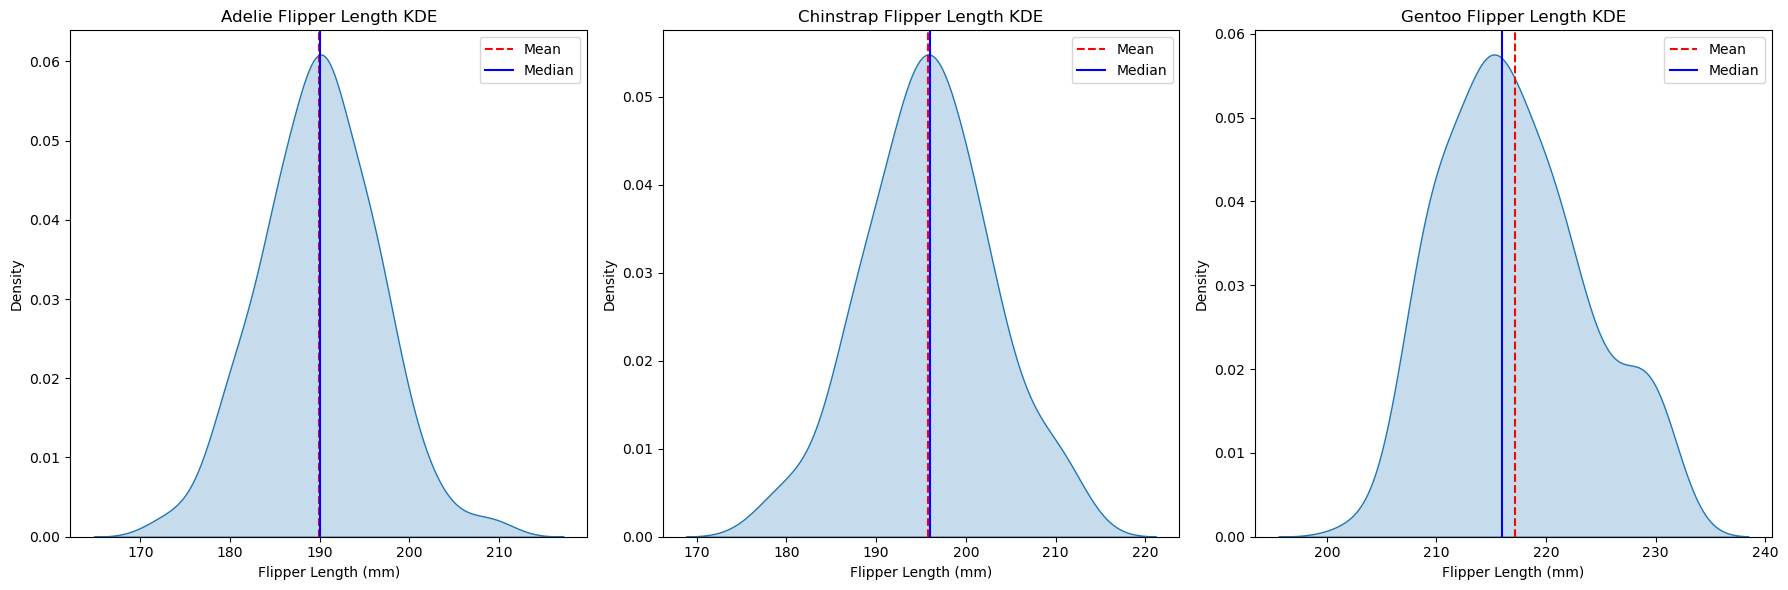

<Figure size 640x480 with 0 Axes>

In [12]:
#QUESTION 2

!pip install seaborn pandas matplotlib
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins_df = pd.read_csv(url)

# Group the data by species and calculate statistics
species_stats = penguins_df.groupby('species')['flipper_length_mm'].agg(['mean', 'median', 'min', 'max', 'std'])
species_stats['range'] = species_stats['max'] - species_stats['min']
species_stats['Q1'] = penguins_df.groupby('species')['flipper_length_mm'].quantile(0.25)
species_stats['Q3'] = penguins_df.groupby('species')['flipper_length_mm'].quantile(0.75)
species_stats['IQR'] = species_stats['Q3'] - species_stats['Q1']
species_stats['std_dev'] = species_stats['std']

# Create a figure with 3 subplots (for each species)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define species list for iteration
species_list = penguins_df['species'].unique()

# Plot KDE for each species and add mean, median lines
for i, species in enumerate(species_list):
    # Filter the data for the current species
    species_data = penguins_df[penguins_df['species'] == species]['flipper_length_mm']
    
    # Get the stats for this species
    mean = species_stats.loc[species, 'mean']
    median = species_stats.loc[species, 'median']
    Q1 = species_stats.loc[species, 'Q1']
    Q3 = species_stats.loc[species, 'Q3']
    min_val = species_stats.loc[species, 'min']
    max_val = species_stats.loc[species, 'max']
    std_dev = species_stats.loc[species, 'std_dev']

    # Plot the KDE
    sns.kdeplot(species_data, ax=axes[i], fill=True)
    
    # Add vertical lines for mean and median
    axes[i].axvline(mean, color='red', linestyle='--', label='Mean')
    axes[i].axvline(median, color='blue', linestyle='-', label='Median')
    
    # Add a legend
    axes[i].legend()
    
    # Add titles and labels
    axes[i].set_title(f'{species} Flipper Length KDE')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].set_ylabel('Density')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Save as a PNG file
plt.savefig("plot.png", format="png")


QUESTION 3. 

In my opinion, the best data visualization type is kernel density estimators. Due to the smooth curve it provides, it is easier to visualize the distribution of data and identify patterns. Using KDE, you can identify multiple peaks in the data because its shape is better than histograms, and it also does not rely on bins. Bins on histograms usually make data analysis harder because if the bin size is too large, you could miss important details about the distribution of data, and if the bin size is too small, the histogram would be cluttered with many bars and it would be difficult to identify the overall pattern. Box plots are also not the best option for identifying patterns in data, as they do not provide information about the distribution's overall shape or the exact number of data points. Box plots provide summaries of data sets, highlighting key statistics like minimum, first quartile, median, third quartile, and maximum, which are only useful for quick insights into the spread of data. 

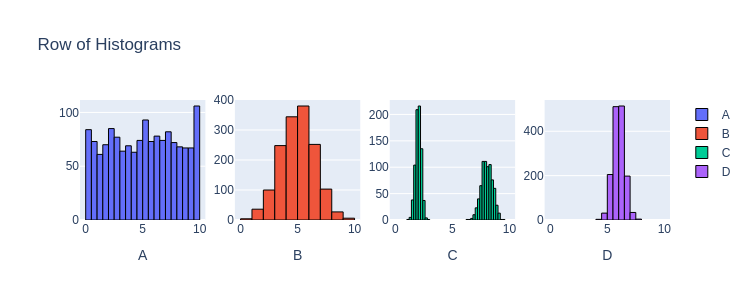

In [9]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer ="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

QUESTION 4. 

1.Which datasets have similar means and similar variances
 
 B and D


2.Which datasets have similar means but quite different variances

A and B

3.Which datasets have similar variances but quite different means

C and D

4.Which datasets have quite different means and quite different variances

A and C 

Means:
 A    5.036155
B    4.863008
C    5.019359
D    5.984214
dtype: float64
Standard Deviations:
 A    2.907675
B    1.488335
C    3.023726
D    0.501264
dtype: float64
Variances:
 A    8.454572
B    2.215140
C    9.142920
D    0.251265
dtype: float64

Using NumPy:
Means (NumPy): A    5.036155
B    4.863008
C    5.019359
D    5.984214
dtype: float64
Standard Deviations (NumPy): A    2.907675
B    1.488335
C    3.023726
D    0.501264
dtype: float64
Variances (NumPy): A    8.454572
B    2.215140
C    9.142920
D    0.251265
dtype: float64


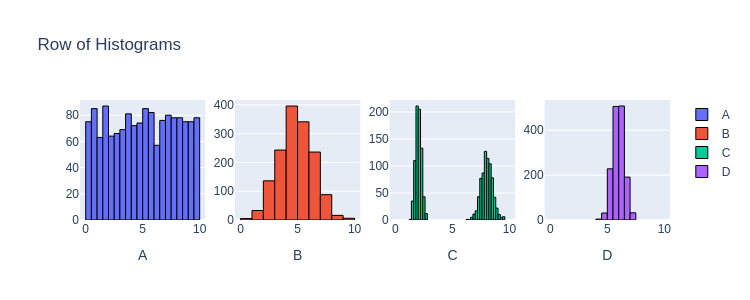

In [10]:
#QUESTION 4 CALCULATIONS

import pandas as pd
from scipy import stats
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Generate the data
n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Create a DataFrame
df = pd.DataFrame({
    'A': data1,
    'B': data2,
    'C': data3,
    'D': data4
})

# Calculate mean, std, and variance using pandas
means = df.mean()
stds = df.std(ddof=1)  # Sample standard deviation (ddof=1)
vars = df.var(ddof=1)  # Sample variance (ddof=1)

# Print the results
print("Means:\n", means)
print("Standard Deviations:\n", stds)
print("Variances:\n", vars)

# Alternatively, using numpy
mean_np = np.mean(df, axis=0)
std_np = np.std(df, axis=0, ddof=1)
var_np = np.var(df, axis=0, ddof=1)

print("\nUsing NumPy:")
print("Means (NumPy):", mean_np)
print("Standard Deviations (NumPy):", std_np)
print("Variances (NumPy):", var_np)

# Plotting histograms
fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)

fig.show(renderer="png")


# Chat GPT Summary 
Topics Discussed:
Data Visualization Techniques:

Explored the differences between box plots, histograms, and kernel density estimators (KDEs) for visualizing data distributions.
Discussed the pros and cons of each method, such as box plots showing quartiles and outliers, histograms providing a range of data, and KDEs indicating the distribution's shape.
Understanding Distributions:

Defined uniform and normal distributions.
Explained key concepts like mean and variance, including sample means, sample standard deviations, and sample variances.
Analyzing Datasets:

Analyzed histograms generated from different datasets to identify similarities and differences in means and variances.
Answered specific questions about the datasets based on visual analysis of the histograms.
Intuitive Understanding:

Discussed intuitive visual methods to understand sample means and variances, emphasizing how they relate to data spread and central tendency.
Questions Addressed:
Characteristics of box plots, histograms, and KDEs.
Understanding means and variances.
Identifying relationships among different datasets in terms of their means and variances.
Key Insights:
Visualizations provide valuable insights into data distributions, helping to quickly identify patterns and differences among datasets.
Understanding fundamental statistical concepts is crucial for interpreting these visualizations effectively.
If you need any more information or have further questions, feel free to ask!

https://chatgpt.com/share/66f4f578-3e14-8006-a2f4-e5073da0d624

# Post-Lecture Homework

       SpendingCelebrating      Candy    Flowers    Jewelry  GreetingCards  \
count             6.000000   6.000000   6.000000   6.000000       6.000000   
mean             28.666667  57.000000  38.166667  22.833333      39.500000   
std              14.733183   9.777525   8.886319  10.870449       5.089204   
min              13.000000  42.000000  25.000000   8.000000      33.000000   
25%              18.250000  52.000000  33.250000  14.750000      35.250000   
50%              25.000000  59.000000  39.000000  24.500000      42.000000   
75%              37.750000  61.500000  43.250000  32.000000      42.750000   
max              51.000000  70.000000  50.000000  34.000000      44.000000   

       EveningOut   Clothing  GiftCards  
count      6.0000   6.000000   6.000000  
mean      32.0000  22.833333  21.166667  
std        6.0663   7.359801   1.722401  
min       24.0000  12.000000  19.000000  
25%       29.2500  19.250000  20.000000  
50%       30.5000  23.000000  21.000000  
75%

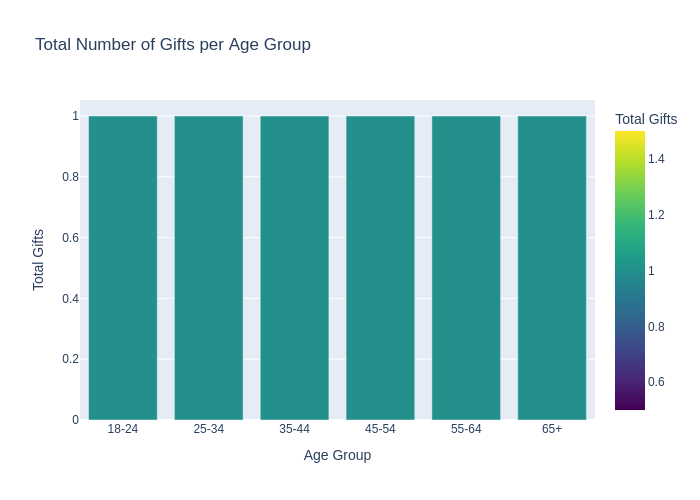

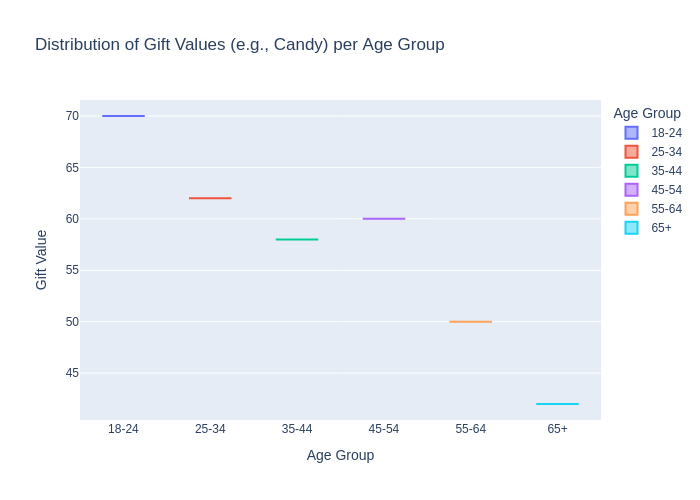

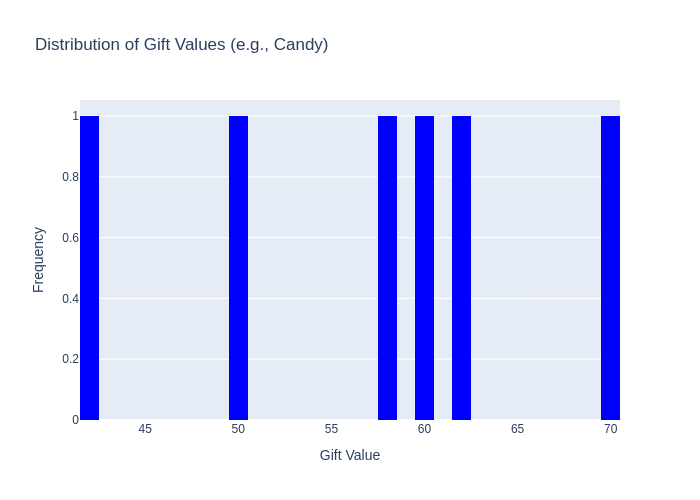

In [13]:
#QUESTION 6

import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-02-13/gifts_age.csv")

# Calculate summary statistics
summary_stats = df.describe()
print(summary_stats)

# 1. Bar Plot: Total Gifts per Age Group
age_counts = df.groupby('Age').size().reset_index(name='total_gifts')

bar_fig = px.bar(age_counts, 
                  x='Age', 
                  y='total_gifts', 
                  title='Total Number of Gifts per Age Group',
                  labels={'total_gifts': 'Total Gifts', 'Age': 'Age Group'},
                  color='total_gifts', 
                  color_continuous_scale=px.colors.sequential.Viridis)
bar_fig.update_layout(xaxis_title='Age Group', yaxis_title='Total Gifts')
bar_fig.show(renderer="png")

# 2. Box Plot: Distribution of Gift Values per Age Group
# Assuming 'Candy' is a column representing the value of gifts
box_fig = px.box(df, 
                  x='Age', 
                  y='Candy',  # Change this to any specific gift type
                  title='Distribution of Gift Values (e.g., Candy) per Age Group',
                  labels={'Candy': 'Gift Value', 'Age': 'Age Group'},
                  color='Age')
box_fig.update_layout(xaxis_title='Age Group', yaxis_title='Gift Value')
box_fig.show(renderer="png")

# 3. Histogram: Distribution of Gift Values
# Using a specific column for values (e.g., 'Candy', 'Jewelry', etc.)
hist_fig = px.histogram(df, 
                         x='Candy',  # Change this to any specific gift type
                         title='Distribution of Gift Values (e.g., Candy)',
                         labels={'Candy': 'Gift Value'},
                         nbins=30, 
                         color_discrete_sequence=['blue'])
hist_fig.update_layout(xaxis_title='Gift Value', yaxis_title='Frequency')
hist_fig.show(renderer ="png")


# Chat GPT Summary 

Here’s a summary of our session:

1. **Exploring Data**:
   - You shared code that loads and analyzes a dataset about gifts across age groups from the `gifts_age.csv` file.
   - We discussed how to calculate summary statistics and visualize the data using various plots.

2. **Visualizations Discussed**:
   - **Histogram**:
     - **Purpose**: Visualizes the distribution of a continuous variable (like gift values).
     - **Key Insights**: Reveals the shape of the distribution, central tendency, spread, and outliers.
   - **Bar Plot**:
     - **Purpose**: Compares categorical data by showing counts or averages for each category (e.g., total gifts per age group).
     - **Key Insights**: Identifies trends in gift-giving and allows for quick visual comparisons between categories.
   - **Box Plot**:
     - **Purpose**: Summarizes the distribution of a dataset focusing on central tendency and variability.
     - **Key Insights**: Displays median, interquartile range, outliers, and allows for comparative analysis between groups.

3. **Specific Insights from Your Code**:
   - The histogram would show how many gifts fall into various value ranges for specific types of gifts (like candy).
   - The bar plot illustrates how many gifts were given to each age group, helping identify preferences in gift-giving.
   - The box plot summarizes the distribution of gift values for different age groups, highlighting central tendencies and variability.

4. **Discussion on Understanding Data Visualization**:
   - We explored the significance of each plot type and how they can provide different perspectives on the data.
   - Emphasized the importance of using multiple visualization types to gain a comprehensive understanding of the dataset.

https://chatgpt.com/share/66f4ff8a-2154-8006-b606-99271503f57b

